## Worksheet 4

### Group 22 Eaton Heidegger and Shannon Schröder

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ordinary Differential equations II - Orbits around a black hole

#### 1. Deriving equation of motions

We are given the Hamiltonian

$H (r, p_r, \theta, p_\theta) = \frac{p_r^2}{2m} + \frac{p_\theta^2}{2mr^2} - \frac{GmM}{r}$

We define:
- $q_1 = r, p_1 = p_r$
- $q_2 = \theta, p_2 = p_0$

We use Hamilton's equations:

$\frac{dq_i}{dt} = \frac{\partial H}{\partial p_i}$

$\frac{dp_i}{dt} = - \frac{\partial H}{\partial q_i}$

So we get for $\dot{r} = \frac{dr}{dt}$

$$\frac{dr}{dt} = \frac{\partial H}{\partial p_r} = \frac{p_r}{m}$$

For $\dot{p_r} = \frac{dp_r}{dt}$ we get

$$\frac{dp_r}{dt} = - \frac{\partial H}{\partial r} = - (\frac{\partial}{\partial r}(\frac{p_\theta^2}{2mr^2} - \frac{GmM}{r})) = - (- \frac{p_\theta^2}{mr^3} + \frac{GmM}{r^2}) = \frac{p_\theta^2}{mr^3} - \frac{GmM}{r^2}$$

For For $\dot{\theta} = \frac{d\theta}{dt}$ we get

$$\frac{d\theta}{dt} = \frac{\partial H}{\partial p_\theta} = \frac{p_\theta}{mr^2}$$

And $\dot{p_\theta} = \frac{dp_\theta}{dt}$ we get

$$\frac{dp_\theta}{dt} =  \frac{\partial H}{\partial \theta} = 0$$

This gives us the final system of four first order ODEs:

$$\frac{dr}{dt} = \frac{p_r}{m}$$
$$\frac{dp_r}{dt} = \frac{p_\theta^2}{mr^3} - \frac{GmM}{r^2}$$
$$\frac{d\theta}{dt} = \frac{p_\theta}{mr^2}$$
$$\frac{dp_\theta}{dt} = 0$$


#### 2. Evolution of the system of equations of motion

In [2]:
# Constants and parameter from number 4
G = 6.67430e-11
M = 2e30  
m = 1.0
c = 3e5

r0 = 8e4
ell = 2e12
E_per_m = -1.3e15
dt = 4e-5  
tend = 0.25  
steps = int(tend / dt)  

In [3]:
def initial_pr(r0, ell, energy_per_m, G, M, m):
    term = 2 * (energy_per_m - (ell**2) / (2 * r0**2) + (G * M) / r0)
    if term < 0:
        raise ValueError("Initial momentum is imaginary")
    return m * np.sqrt(term)

print(f"Initial momentum: {initial_pr(r0, ell, E_per_m, G, M, m) / 1000:.2f} km/s")

Initial momentum: 10590.09 km/s


With this function we calculate the initial radial momentum. We got this formula from transforming the energy conversation formula

$E = \frac{p_r^2}{2m} + \frac{p_\theta^2}{2mr^2} - \frac{GmM}{r}$

to $p_r^2 / m$. We also checked if the term gets negative under the square root, to avoid imaginary values. We took the square root of the term at the end and multiplied it with $m$(which in this exercise is $1$ as it is a particle) to get $p_r$.

In [4]:
def dfs(y, m, l, G, M):
    r, pr, theta = y
    dr_dt = pr / m
    dpr_dt = (l**2) / (m * r**3) - G * m * M / (r**2)
    dtheta_dt = l / (r**2)
    return np.array([dr_dt, dpr_dt, dtheta_dt])

Here we define differential equations that we derived in number 1 and put them into an array.

In [5]:
def rk2(y, h, m, l, G, M):
    k1 = dfs(y, m, l, G, M)
    k2 = dfs(y + h * k1, m, l, G, M)
    return y + (h / 2) * (k1 + k2)

Here we implement the Heun’s second-order Runge-Kutta (RK2) method to numerically integrate the system of equations over a small time step $h$. The RK2 method approximates the solution by taking two "slopes" or estimates of the derivative ($k1$ and $k2$), and then combining them to get an updated state. $k1$ is the first approximation of the derivative based on the current state $y$. $k2$ is a second approximation based on advancing the state using the first estimate $(y + h * k1)$. The final state is updated by averaging these two slopes: $y + (h / 2) * (k1 + k2)$.

In [6]:
def integrate_orbit(r0, theta0, ell, energy_per_m, h, steps, G, M, m):
    pr0 = initial_pr(r0, ell, energy_per_m, G, M, m)
    y = np.array([r0, pr0, theta0])
    trajectory = [y.copy()]

    for _ in range(steps):
        y = rk2(y, h, m, ell, G, M)
        trajectory.append(y.copy())

    return np.array(trajectory)

Here we integrate the orbit of the particle using the RK2 method over a given number of steps. We use our initial_pr function to calculate the initial momentum $pr_0$. The system starts at the initial conditions [$r_0$, $p_{r0}$, $\theta_0$] and iteratively evolves using the RK2 method over steps time steps, storing the trajectory at each step. The trajectory is returned as a NumPy array.

In [7]:
traj_rk2 = integrate_orbit(r0, 0, ell, E_per_m, dt, steps, G, M, m)

r_values_rk2 = traj_rk2[:, 0]
theta_values_rk2 = traj_rk2[:, 2]

x_rk2 = r_values_rk2 * np.cos(theta_values_rk2)
y_rk2 = r_values_rk2 * np.sin(theta_values_rk2)

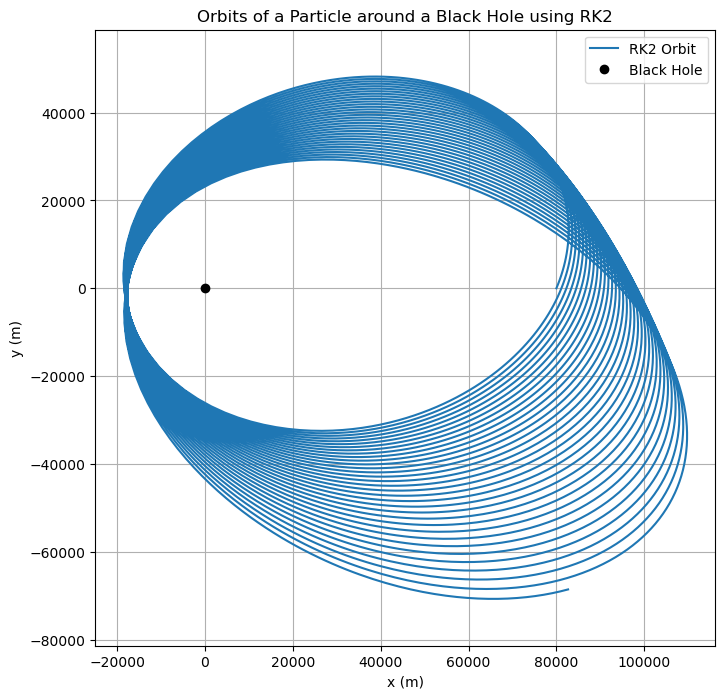

In [8]:
plt.figure(figsize=(8, 8))
plt.plot(x_rk2, y_rk2, label='RK2 Orbit')
plt.plot(0, 0, 'ko', label='Black Hole')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Orbits of a Particle around a Black Hole using RK2')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

Here we can see the resulting orbit by using the RK2 method to integrate the orbit of a particle around a black hole in cartesian coordinates. We used the initial conditions from number 4 to simulate the orbit of the particle.

#### 3. Leapfrog sheme

In [9]:
def leapfrog_step(y, m, l, G, M, dt):
    r, pr, theta = y

    r_half = r + (dt / 2) * (pr / m)

    theta_half = theta + (dt / 2) * l / (m * r_half**2)

    a_half = (l**2 / (m * r_half**3) - G * M / (r_half**2))
    pr_next = pr + dt * a_half

    r_next = r_half + (dt / 2) * (pr_next / m)

    theta_next = theta_half + (dt / 2) * l / (m * r_next**2)

    ptheta_next = l

    return np.array([r_next, pr_next, theta_next])

Here implement one time step of the symplectic leapfrog integration scheme to update the particle's state, which consists of the radial position ($r$), radial momentum ($p_r$), and angular position ($\theta$). First we update $r$ by half a step, based on the current radial momentum $p_r$. Next we update $\theta$ by half a step, by using the half-step value of the radial position. This depends on the angular momentum $l$, which is conserved. Then we update the momentum $p_r$ by a full step. We use an acceleration term that is based on the gravitational force and the centrifugal force. Next we update $r$ by another half step using the new momentum value. We then update $\theta$ again similiary to how we updated it previously. The angular momentum ($p_\theta$) is constant throughout the integration because no torque is acting on the system. Hence, it remains equal to l at each step.

In [10]:
def integrate_orbit_leapfrog(r0, theta0, ell, energy_per_m, dt, steps, G, M, m):
    pr0 = initial_pr(r0, ell, energy_per_m, G, M, m)
    y = np.array([r0, pr0, theta0])
    trajectory = [y.copy()]

    for _ in range(steps):
        y = leapfrog_step(y, m, ell, G, M, dt)
        trajectory.append(y.copy())

    return np.array(trajectory)

Here we again integrate the orbit of the particle, this time adjusted for the leapfrog method, over a pecified number of steps. It also computes the trajectory, storing the state (position and momentum) at each time step. The initial conditions ($r_0$, $\theta_0$, and $ell$) are used to compute the initial radial momentum ($p_{r0}$) with the initial_pr function. The integration proceeds by repeatedly calling the leapfrog_step function to evolve the system over steps iterations. The state (position and momentum) at each step is stored in the trajectory list, which is returned as a NumPy array.

In [11]:
traj_leapfrog = integrate_orbit_leapfrog(r0, 0, ell, E_per_m, dt, steps, G, M, m)

r_values_leapfrog = traj_leapfrog[:, 0]
theta_values_leapfrog = traj_leapfrog[:, 2]

x_leapfrog = r_values_leapfrog * np.cos(theta_values_leapfrog)
y_leapfrog = r_values_leapfrog * np.sin(theta_values_leapfrog)

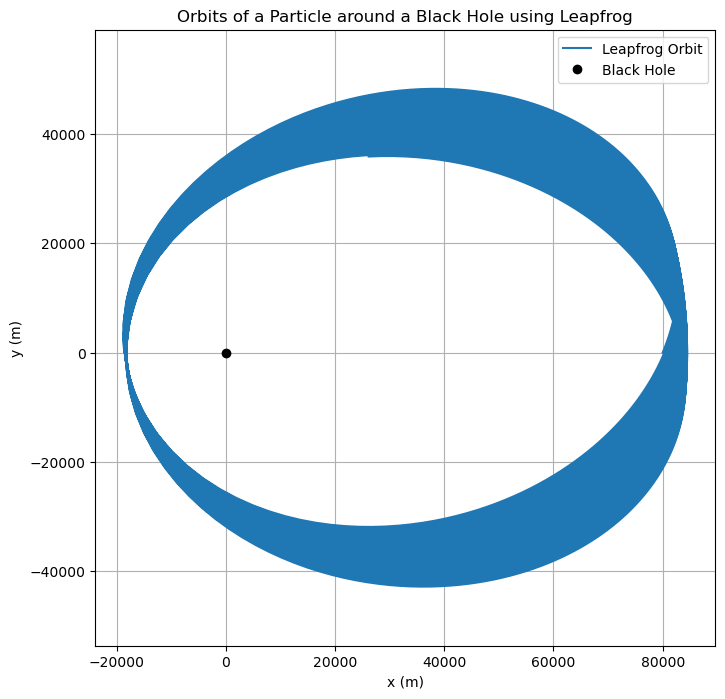

In [12]:
plt.figure(figsize=(8, 8))
plt.plot(x_leapfrog, y_leapfrog, label='Leapfrog Orbit')
plt.plot(0, 0, 'ko', label='Black Hole')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Orbits of a Particle around a Black Hole using Leapfrog')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

Here we can see the resulting orbit by using the leapfrog method to integrate the orbit of a particle around a black hole in cartesian coordinates. We used the initial conditions from number 4 to simulate the orbit of the particle.

#### 4. Combining the methods

In [12]:
traj_rk2 = integrate_orbit(r0, 0, ell, E_per_m, dt, steps, G, M, m)
traj_leapfrog = integrate_orbit_leapfrog(r0, 0, ell, E_per_m, dt, steps, G, M, m)

r_values_rk2 = traj_rk2[:, 0]
theta_values_rk2 = traj_rk2[:, 2]

r_values_leapfrog = traj_leapfrog[:, 0]
theta_values_leapfrog = traj_leapfrog[:, 2]

In [13]:
x_rk2 = r_values_rk2 * np.cos(theta_values_rk2)
y_rk2 = r_values_rk2 * np.sin(theta_values_rk2)

x_leapfrog = r_values_leapfrog * np.cos(theta_values_leapfrog)
y_leapfrog = r_values_leapfrog * np.sin(theta_values_leapfrog)

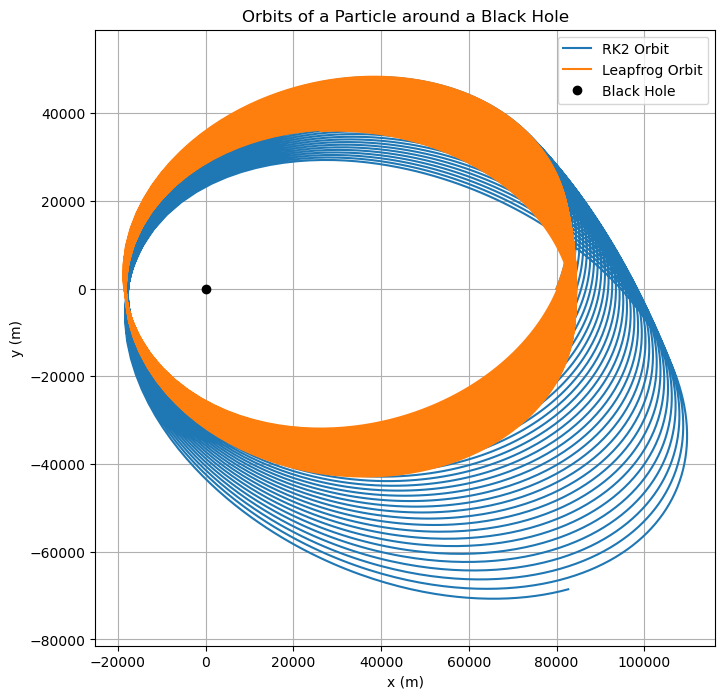

In [14]:
plt.figure(figsize=(8, 8))
plt.plot(x_rk2, y_rk2, label='RK2 Orbit')
plt.plot(x_leapfrog, y_leapfrog, label='Leapfrog Orbit')
plt.plot(0, 0, 'ko', label='Black Hole')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Orbits of a Particle around a Black Hole')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

Here we can see both methods plotted over one another. The body does not fall in, which is also expected here since the angular momentum is high enough to maintain a bounded precessing orbit. Both are plotted in the x-y plane using $x(t)=r(t)*\cos(\theta(t))$ and $y(t)=r(t)*\sin(\theta(t))$.

In [15]:
def velocity(r, pr, l, m):
    v_r = pr / m  
    v_theta = l / (m * r**2)  
    v_total = np.sqrt(v_r**2 + v_theta**2)  
    return v_total

Here we compute the total velocity of the orbiting body at each point based on the radial and tangential components of the motion. 

In [16]:
def fraction_of_c(trajectory, m, l, c):
    velocities = []
    for r, pr, theta in trajectory:
        v = velocity(r, pr, l, m)
        velocities.append(v / c)
    return np.array(velocities)

This function calculates the fraction of the speed of light that the orbiting body reaches at each time step of the simulation. It loops trough the trajectory for each point and then returns an array of the fractions of the speed of light over the course of the trajectory.

In [37]:
fraction_rk2 = fraction_of_c(traj_rk2, m, ell, c)
fraction_leapfrog = fraction_of_c(traj_leapfrog, m, ell, c)

print(f"Maximum fraction of the speed of light for RK2: {max(fraction_rk2):.3f}")
print(f"Maximum fraction of the speed of light for Leapfrog: {max(fraction_leapfrog):.3f}")

Maximum fraction of the speed of light for RK2: 0.180
Maximum fraction of the speed of light for Leapfrog: 0.144


We take the maximum fraction of the speed of light from our fraction_of_c function and print it. The particle both the RK2 and Leapfrog methods reaches a maximum speed that is around 18% of the speed of light (for RK2) and 14% of the speed of light (for Leapfrog). 

#### 5. Perihelion precession

The second-order Runge-Kutta method  is a general-purpose numerical integrator that offers improved accuracy over Euler’s method. However, when applied to Hamiltonian systems such as orbital dynamics, RK2 has a significant limitation: it is not symplectic. 

Symplectic integrators preserve the geometric structure of phase space, which is critical for long-term stability in conservative systems. Because RK2 is not symplectic, it does not conserve energy over long time spans. Instead, RK2 tends to introduce energy drift, especially when the time step $\Delta t$ is too large. This manifests as the orbit gradually spiraling in (losing energy) or spiraling out (gaining energy), depending on the numerical bias. 

As a result, RK2 may produce orbit shapes that are increasingly unphysical over time. While smaller time steps can mitigate this, RK2 generally lacks the long-term fidelity needed for simulating orbital systems accurately over many cycles.

The leapfrog method is a symplectic integrator, meaning it is designed to preserve the phase space volume and the Hamiltonian structure of the equations of motion. This makes it particularly well-suited for systems where energy conservation and long-term stability are essential, such as gravitational orbits.

With a sufficiently small time step, the leapfrog method maintains bounded energy oscillations around the true energy and preserves the qualitative features of the orbit. However, leapfrog is not immune to all errors. A known artifact of this method, especially when time steps are relatively large, is the appearance of numerically induced perihelion precession.

This means that the points of closest (perihelion) and farthest (aphelion) approach to the central mass shift over time, even though the physical system should produce a closed elliptical orbit. The precession is not due to physical effects but is a numerical artifact that grows with increasing step size $\Delta t$. As a result, the elliptical orbit appears to rotate slowly around the central object.

In [20]:
# Function to find perihelia in the trajectory
def find_perihelia(r, theta, t):
    peri_times = []
    peri_angles = []
    peri_coords = []
    for i in range(1, len(r)-1):
        if r[i] < r[i-1] and r[i] < r[i+1]:
            peri_times.append(t[i])
            peri_angles.append(theta[i] % (2 * np.pi))
            x = r[i] * np.cos(theta[i])
            y = r[i] * np.sin(theta[i])
            peri_coords.append((x, y))
    return np.array(peri_times), np.array(peri_angles), np.array(peri_coords)

In this function we identify the points in the trajectory where the particle is at the perihelion. The perihelion is defined as the point in the orbit where the radial distance $r$ is at a local minimum, indicating the closest approach to the central body.

We tested various time steps to show the perihelion precession of the leapfrog method. For each time step, the orbit is simulated using the integrate_orbit_leapfrog function. The radial and angular components of the trajectory are used to find the perihelia. 

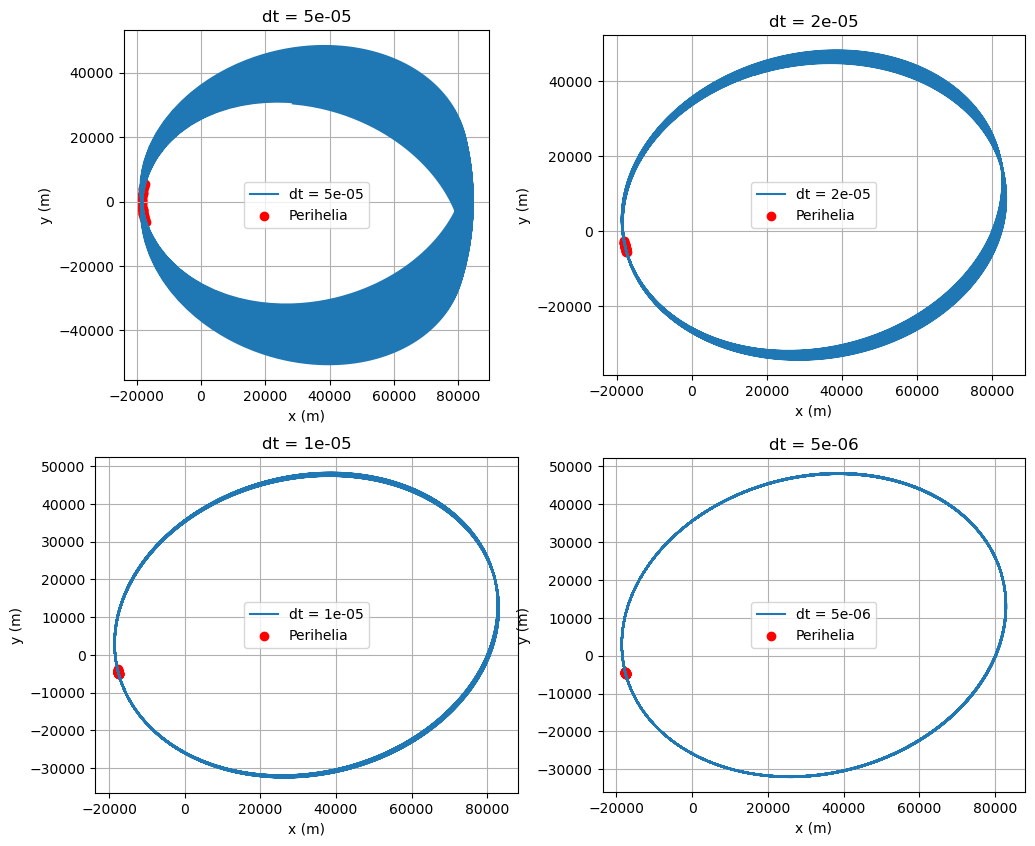

In [21]:
# Plotting the perihelia for different time steps
# Time steps to compare
time_steps = [5e-5, 2e-5, 1e-5, 5e-6]
t_end = 0.25

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, dt in enumerate(time_steps):
    steps = int(t_end / dt)
    trajectory = integrate_orbit_leapfrog(r0, 0, ell, E_per_m, dt, steps, G, M, m)

    r_values = trajectory[:, 0]
    theta_values = trajectory[:, 2]
    time_values = np.arange(steps + 1) * dt

    peri_times, peri_angles, peri_coords = find_perihelia(r_values, theta_values, time_values)    

    x = r_values * np.cos(theta_values)
    y = r_values * np.sin(theta_values)

    axs[i].plot(x, y, label=f"dt = {dt:.0e}")
    if len(peri_coords) > 0:
        peri_x, peri_y = peri_coords[:, 0], peri_coords[:, 1]
        axs[i].scatter(peri_x, peri_y, color="red", label="Perihelia")
    axs[i].set_title(f"dt = {dt}")
    axs[i].set_xlabel("x (m)")
    axs[i].set_ylabel("y (m)")
    axs[i].set_aspect("equal")
    axs[i].grid()
    axs[i].legend()

In the plot we can see that for the time step $dt=5^{-5}$, perihelion precession is indeed happening for the leapfrog method. We can also see with decreasing the time steps, the number of perihelions is also decreasing. In the final figure where the time step is $dt=5^{-6}$, only a very slight precession can be seen.

#### 6. Orbits with different energy levels

In [22]:
energy_levels = [
    -1.3e15,   
    -1e14,     
     0,        
     1e14      
]

dt = 4e-5
t_end = 0.3
steps = int(t_end / dt)

Here we define the different energy levels we explore:
- Bound orbits have negative energy values ($E < 0$), like elliptical and circular orbits.
- Parabolic trajectory has zero energy ($E = 0$), which is the escape trajectory from the central body
- Unbound orbits have positive energy values ($E > 0$), like hyperbolic trajectories.

To plot the orbits, we loop over each energy level. To make sure for the closed orbits that the orbits are closed, we increased $t_{end} = 0.3$, which we found out through trial and error. For each energy level we integrate the orbit using the leapfrog method. If an error occurs, a value error will be raised. To plot the phase space for bound orbits, we plotted only the bound orbits ($E < 0$) and plotted $r$ against $p_r$.

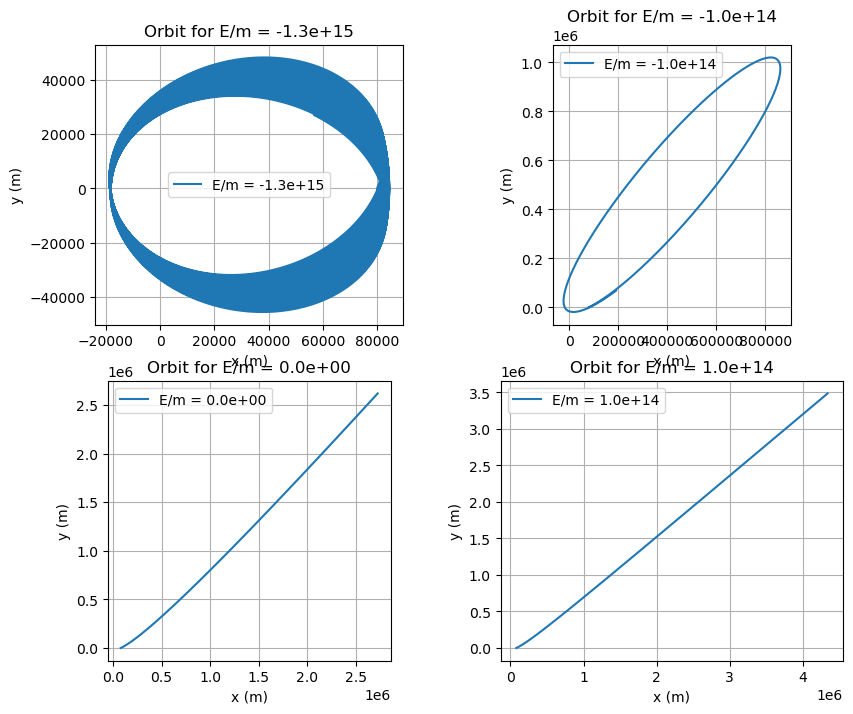

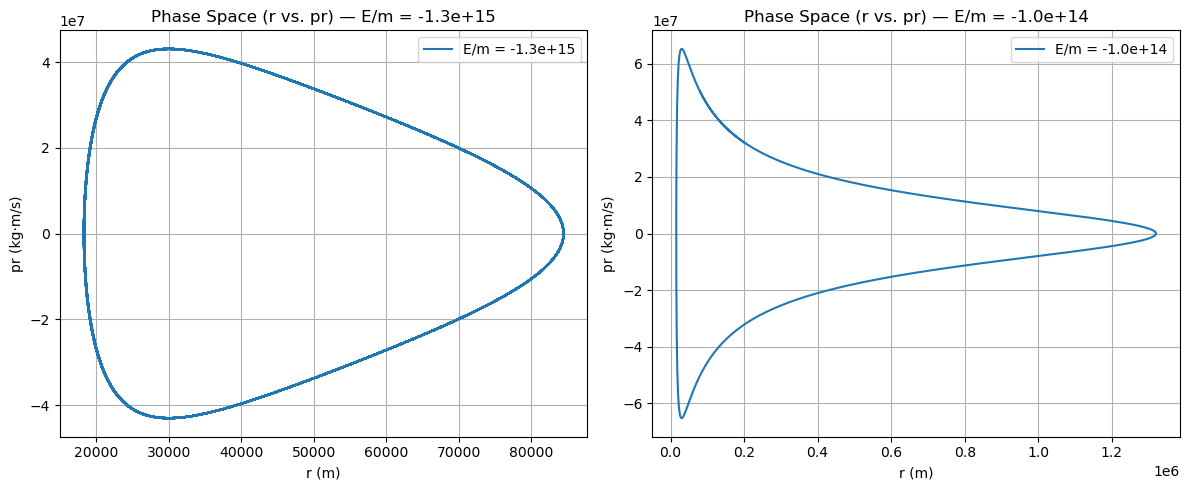

In [23]:
fig_orbit, axs_orbit = plt.subplots(2, 2, figsize=(10, 8))
fig_phase, axs_phase = plt.subplots(1, 2, figsize=(12, 5))

axs_orbit = axs_orbit.flatten()

for i, E_per_m in enumerate(energy_levels):
    try:
        trajectory = integrate_orbit_leapfrog(r0, 0, ell, E_per_m, dt, steps, G, M, m)
    except ValueError:
        print(f"Skipped E/m = {E_per_m}: Invalid initial momentum")
        continue

    r = trajectory[:, 0]
    pr = trajectory[:, 1]
    theta = trajectory[:, 2]

    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Orbit plot
    axs_orbit[i].plot(x, y, label=f"E/m = {E_per_m:.1e}")
    axs_orbit[i].set_title(f"Orbit for E/m = {E_per_m:.1e}")
    axs_orbit[i].set_xlabel("x (m)")
    axs_orbit[i].set_ylabel("y (m)")
    axs_orbit[i].set_aspect("equal")
    axs_orbit[i].grid()
    axs_orbit[i].legend()

    # Phase space only for bound orbits (E < 0)
    if E_per_m < 0:
        axs_phase[i].plot(r, pr, label=f"E/m = {E_per_m:.1e}")
        axs_phase[i].set_title(f"Phase Space (r vs. pr) — E/m = {E_per_m:.1e}")
        axs_phase[i].set_xlabel("r (m)")
        axs_phase[i].set_ylabel("pr (kg·m/s)")
        axs_phase[i].grid()
        axs_phase[i].legend()

plt.tight_layout()
plt.show()

The plots in the top show he particle's motion in the x-y plane for different energy levels. For the bound orbit at $E/m = −1.3*10^{15} m^2 / s^2$ a stable orbit can be seen, with perihelion precession. The orbit stays close to the black hole, but does not fall in. For the bound orbit at $E/m = −1*10^{14} m^2 / s^2$ the orbit is still bound, but is more stretched and elliptical, with larger aphelion distance. The energy is closer to $0$, so it's loosely bound and more extended. For the unbound orbit $E/m = 0$, the path is an open parabolic-like trajectory. The particle doesn't return. And for the unbound orbit $E/m = 1*10^{14} m^2 / s^2$, the particle escapes aswell.

The bottom plots show the phase space diagramms for the bound orbits. For the bound orbit at $E/m = −1.3*10^{15} m^2 / s^2$ the closed loop in phase space confirms bounded motion. For the bound orbit at $E/m = −1*10^{14} m^2 / s^2$, is also closed but much wider, showing greater excursion in $r$, consistent with a high-aphelion orbit. The shape is more distorted, showing that radial motion becomes more dominant as binding energy decreases.

#### 7. Energy conservation

In [24]:
def energy_per_mass(r, pr, ell, G, M, m):
    kinetic = 0.5 * (pr**2 / m**2 + ell**2 / (m**2 * r**2))
    potential = - G * M / r
    return kinetic + potential

In this function we compute the specific energy at a given point in a trajectory.

In [25]:
# Time steps to try
time_steps = [5e-5, 2e-5, 1e-5, 5e-6]
t_end = 0.25

# Storage
results_rk2 = []
results_lf = []

To plot the energy over time, we iterate over the time steps and calculate the numer of steps for each stime step. Then we integrate the orbits using our RK2 and leapfrog method. Then we calculate the specific energy for each method. And the we plot the time against the energy for each time step for each method.

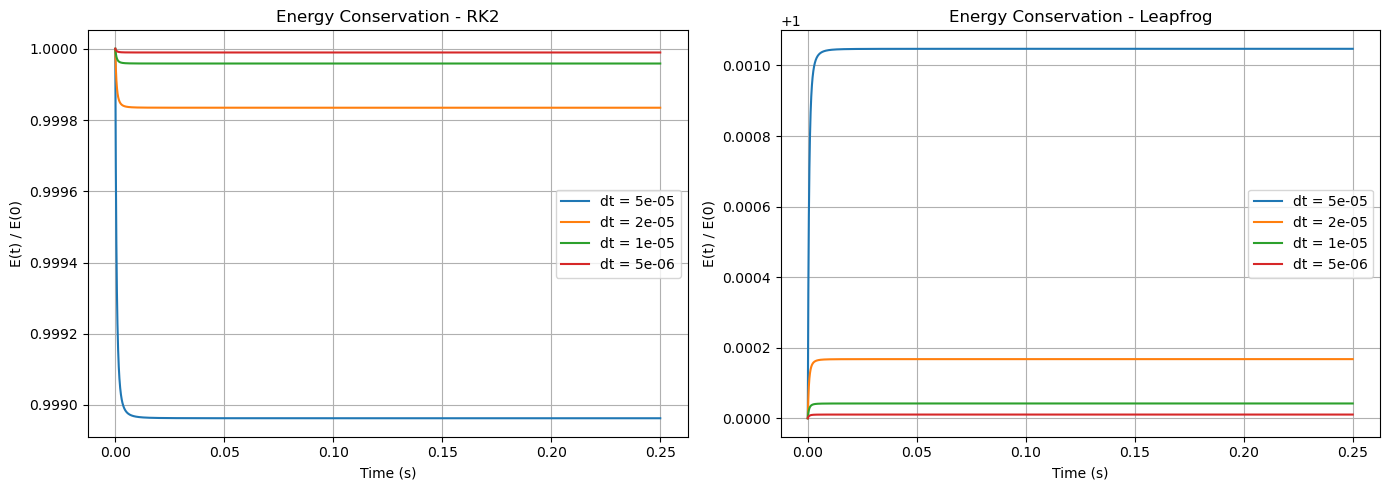

In [26]:
for dt in time_steps:
    steps = int(t_end / dt)
    time = np.arange(steps + 1) * dt

    traj_rk2 = integrate_orbit(r0, 0, ell, E_per_m, dt, steps, G, M, m)
    traj_lf = integrate_orbit_leapfrog(r0, 0, ell, E_per_m, dt, steps, G, M, m)

    # Compute energy per mass over time
    E_rk2 = energy_per_mass(traj_rk2[:, 0], traj_rk2[:, 1], ell, G, M, m)
    E_lf = energy_per_mass(traj_lf[:, 0], traj_lf[:, 1], ell, G, M, m)

    results_rk2.append((time, E_rk2 / E_rk2[0]))
    results_lf.append((time, E_lf / E_lf[0]))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for i, dt in enumerate(time_steps):
    time_rk2, E_rk2 = results_rk2[i]
    time_lf, E_lf = results_lf[i]
    
    axs[0].plot(time_rk2, E_rk2, label=f'dt = {dt:.0e}')
    axs[1].plot(time_lf, E_lf, label=f'dt = {dt:.0e}')

axs[0].set_title('Energy Conservation - RK2')
axs[1].set_title('Energy Conservation - Leapfrog')

for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('E(t) / E(0)')
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()



In the first plot we can see the energy conservation with our RK2 method. For larger time steps, energy drops quickly and then levels off. The blue and orange lines deviate the most. For smaller time steps (green and red), the energy is much better conserved, staying very close to $1$. This is expected: RK2 isn't symplectic, so it tends to dissipate energy over time — but smaller $\Delta t$ reduces the drift.

In the second plot we can see the energy conservation with our leapfrog method. Here it stays around $1$ with only sligh deviations between the time steps. Even for large time steps, energy deviation is tiny and stays constant, very little drift. This flatness across all time steps is a trademark of a symplectic integrator.

#### 8. Post Newtonian corrections

In [27]:
def leapfrog_post_newtonian(y, m, l, G, M, dt, c):
    r, pr, theta = y
    R_s = 2 * G * M / c**2

    r_half = r + (dt / 2) * (pr / m)

    a_half = ((l**2) / (m**2 * r_half**3)) * (1 - (3 * G * M) / (c**2 * r_half)) - G * M / (r_half**2)
    pr_half = pr + (dt / 2) * a_half

    theta_half = theta + (dt / 2) * l / (m * r_half**2)

    pr_full = pr_half + dt * a_half
    r_full = r_half + (dt / 2) * (pr_full / m)
    theta_full = theta_half + (dt / 2) * l / (m * r_full**2)

    if r_full < R_s:
        print(f"Body has fallen into the black hole (r = {r_full:.2f}, R_s = {R_s}).")
        return None

    return np.array([r_full, pr_full, theta_full])

Here we modified our leapfrog method. We added the relativistic correction to the radial acceleration a_half. The relativistic correction accounts for the influence of general relativity near the black hole. If the particle's distance falls below the Schwarzschild radius, the particle is considered to have fallen into the black hole, and the integration is stopped.

In [28]:
def integrate_orbit_post_newtonian(y0, h, steps, ell, G, M, m, c):
    y = np.array(y0)
    trajectory = [y.copy()]

    for _ in range(steps):
        y = leapfrog_post_newtonian(y, m, ell, G, M, h, c)
        if y is None:
            print("Integration stopped: body has fallen into the black hole.")
            break
        trajectory.append(y.copy())

    return np.array(trajectory)
    

We also slightly modified our integrator function for the leapfrog method, which also checks if the particle has fallen into the black hole. If yes, the integration is stopped early.

In [29]:
G = 6.67430e-11  
M = 2e30  
m = 1.0
c = 3e8  
#R_s = (2 * G * M) / c**2

r0 = 80e3  
theta0 = 0.0
ell = 2e12 
E_per_m = -1.3e9  * 1e6
dt = 4e-5
pr0 = initial_pr(r0, ell, E_per_m, G, M, m)
tend = 0.25  
steps = int(tend / dt)

y0 = [r0, pr0, theta0]

We used the same conditions from number 4. Then we plotted the orbit and made sure to stop plotting if the particle falls into the black hole.

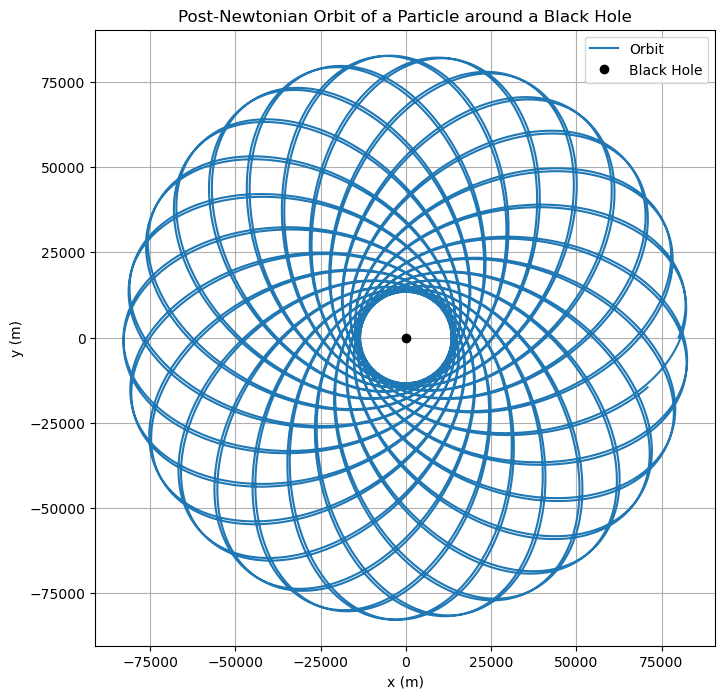

In [30]:
trajectory = integrate_orbit_post_newtonian(y0, dt, steps, ell, G, M, m, c)

if trajectory is not None:
    #for i, state in enumerate(trajectory[:10]):
        #print(f"Step {i}: r = {state[0]:.2f}, pr = {state[1]:.2f}, theta = {state[2]:.4f}")
    
    plt.figure(figsize=(8, 8))
    plt.plot(trajectory[:, 0] * np.cos(trajectory[:, 2]),
             trajectory[:, 0] * np.sin(trajectory[:, 2]),
             label='Orbit')
    plt.plot(0, 0, 'ko', label='Black Hole')
    plt.title('Post-Newtonian Orbit of a Particle around a Black Hole')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.axis('equal')
    plt.grid()
    plt.legend()
    plt.show()
else:
    print("Simulation stopped before a valid orbit could be completed.")

The impact of the relativistic term can be seen in this plot, as it looks a lot more different now compared to the previous orbit from the leapfrog method. The orbit resembles a rosetta and with the initial condtions that were given in number 4, the particle seems to be on a stable orbit and does not fall into black hole.

#### 9. Plunging orbit

In [31]:
ell_new = 1.7e12
pr0_new = initial_pr(r0, ell_new, E_per_m, G, M, m)
y0_new = [r0, pr0_new, theta0]
dt = 4e-7
tend = 0.25
steps = int(tend / dt)
print(f"Initial momentum for new ell: {pr0_new / 1000:.2f} km/s")

Initial momentum for new ell: 16899.33 km/s


With the new angular momentum, we had to recalculate the initial momentum. We also decreased the time step from $dt=4*10^{-5}$ to $dt=4*10^{-7}$, so that the orbit would look more smoothly, more round otherwise it would have the same trajectory but it would look very edgy. We then plotted it the same way, as in number 8.

Body has fallen into the black hole (r = 2872.16, R_s = 2966.3555555555554).
Integration stopped: body has fallen into the black hole.


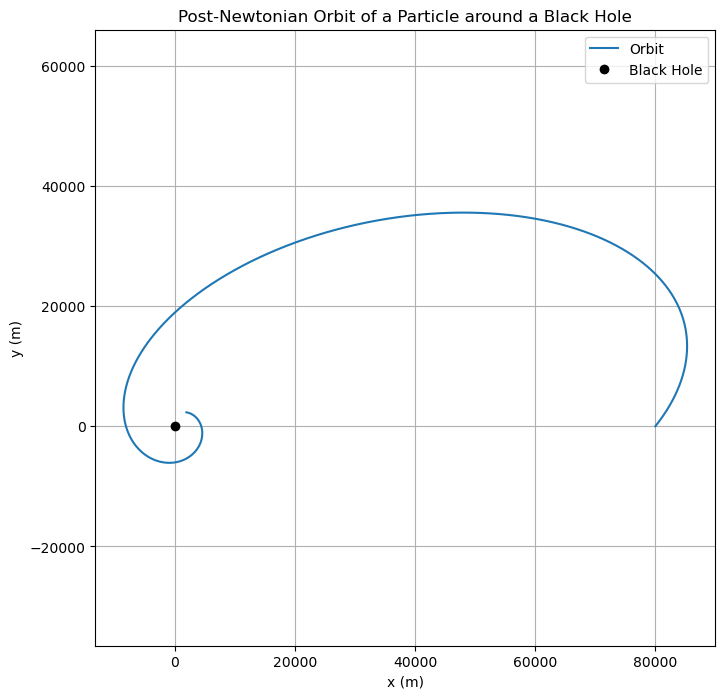

In [32]:
trajectory_new = integrate_orbit_post_newtonian(y0_new, dt, steps, ell_new, G, M, m, c)

if trajectory_new is not None:
    #for i, state in enumerate(trajectory_new[:10]):
        #print(f"Step {i}: r = {state[0]:.2f}, pr = {state[1]:.2f}, theta = {state[2]:.4f}")

    plt.figure(figsize=(8, 8))
    plt.plot(trajectory_new[:, 0] * np.cos(trajectory_new[:, 2]),
             trajectory_new[:, 0] * np.sin(trajectory_new[:, 2]),
             label='Orbit')
    plt.plot(0, 0, 'ko', label='Black Hole')
    plt.title('Post-Newtonian Orbit of a Particle around a Black Hole')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.axis('equal')
    plt.grid()
    plt.legend()
    plt.show()
else:
    print("Simulation stopped before a valid orbit could be completed.")

In this plot we can see, with decreasing the angular momentum, the particle reaches a radius below the Schwarzschild radius, which results in the particle falling into the black hole. The orbit is decreasing very fast and particle is plunging towards the black hole.

#### 10. 

In [33]:
ell = 2e12 
pr0 = initial_pr(r0, ell, E_per_m, G, M, m)

y0 = [r0, pr0, theta0]

In [34]:
def find_perihelia(r, theta, t, min_interval=0.05):
    peri_times = []
    peri_angles = []
    peri_coords = []

    last_time = -np.inf

    for i in range(1, len(r) - 1):
        if r[i] < r[i - 1] and r[i] < r[i + 1]:
            # Filter out closely spaced minima (to avoid noise)
            if t[i] - last_time > min_interval:
                last_time = t[i]
                peri_times.append(t[i])
                peri_angles.append(theta[i] % (2 * np.pi))  # Normalize angle
                x = r[i] * np.cos(theta[i])
                y = r[i] * np.sin(theta[i])
                peri_coords.append((x, y))

    return np.array(peri_times), np.array(peri_angles), np.array(peri_coords)


Function to detect the perihelia from number 5

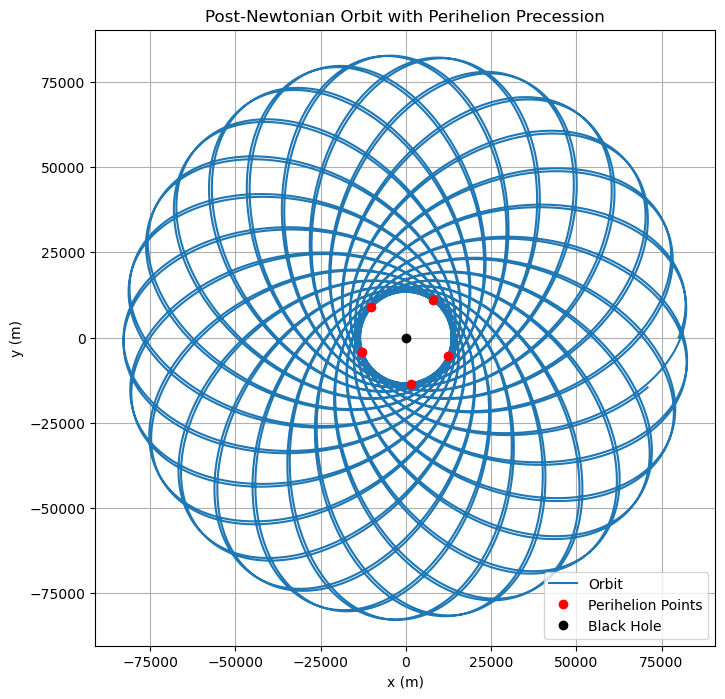

In [35]:
dt = 4e-5  # Time step (s)
tend = 0.25  # Total simulation time (s)
steps = int(tend / dt)

trajectory = integrate_orbit_post_newtonian(y0, dt, steps, ell, G, M, m, c)

# Track perihelion points using find_perihelia function
r_vals = trajectory[:, 0]  # Extract radial distances
theta_vals = trajectory[:, 2]  # Extract angles
times = np.arange(steps) * dt  # Time values corresponding to each step

peri_times, peri_angles, peri_coords = find_perihelia(r_vals, theta_vals, times)

# Plot the orbit and perihelion precession
if trajectory is not None:
    plt.figure(figsize=(8, 8))

    # Plot the orbit
    plt.plot(trajectory[:, 0] * np.cos(trajectory[:, 2]),
             trajectory[:, 0] * np.sin(trajectory[:, 2]),
             label='Orbit')

    # Plot perihelion precession
    if len(peri_coords) > 0:  # Check if perihelion points exist
        peri_coords = np.array(peri_coords)
        plt.plot(peri_coords[:, 0], peri_coords[:, 1], 'ro', label='Perihelion Points')

    plt.plot(0, 0, 'ko', label='Black Hole')
    plt.title('Post-Newtonian Orbit with Perihelion Precession')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.axis('equal')
    plt.grid()
    plt.legend()
    plt.show()

else:
    print("Simulation stopped before a valid orbit could be completed.")


The red dots are the perihelion points, the closest approach to the black hole for each orbit. In this simulation, the ellipse rotates gradually, creating a rosette-like pattern. The red perihelion points shift over time, tracing a partial circle around the central mass, this is perihelion precession. In the next plot we will see how this compares to newtonian physics from our simulation from number 4.

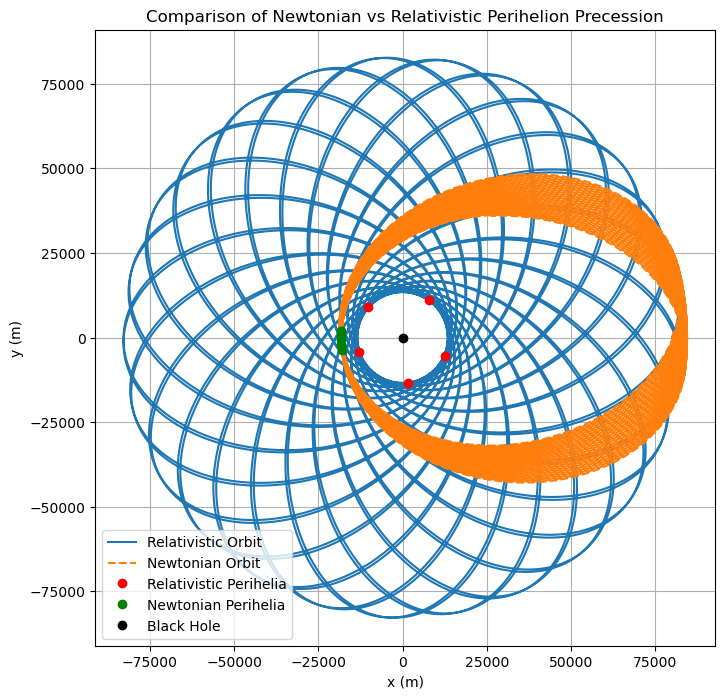

In [36]:
trajectory_newtonian = integrate_orbit_leapfrog(r0, theta0, ell, E_per_m, dt, steps, G, M, m)
r_vals_N = trajectory_newtonian[:, 0]
theta_vals_N = trajectory_newtonian[:, 2]
peri_times_N, peri_angles_N, peri_coords_N = find_perihelia(r_vals_N, theta_vals_N, times)

plt.figure(figsize=(8, 8))

# Relativistic orbit
plt.plot(trajectory[:, 0] * np.cos(trajectory[:, 2]),
         trajectory[:, 0] * np.sin(trajectory[:, 2]), label='Relativistic Orbit')

# Newtonian orbit
plt.plot(trajectory_newtonian[:, 0] * np.cos(trajectory_newtonian[:, 2]),
         trajectory_newtonian[:, 0] * np.sin(trajectory_newtonian[:, 2]), '--', label='Newtonian Orbit')

# Relativistic perihelia
if len(peri_coords) > 0:
    peri_coords = np.array(peri_coords)
    plt.plot(peri_coords[:, 0], peri_coords[:, 1], 'ro', label='Relativistic Perihelia')

# Newtonian perihelia
if len(peri_coords_N) > 0:
    peri_coords_N = np.array(peri_coords_N)
    plt.plot(peri_coords_N[:, 0], peri_coords_N[:, 1], 'go', label='Newtonian Perihelia')

# Central object
plt.plot(0, 0, 'ko', label='Black Hole')

plt.title('Comparison of Newtonian vs Relativistic Perihelion Precession')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

The Newtonian orbit is an ellipse that remains fixed in space, the perihelion doesn’t move. The green perihelion points for Newtonian mechanics are overlapping, indicating that the minimum distance from the star to the black hole occurs at the same angle each orbit. The relativistic orbit precesses, the perihelion moves forward with each orbit. The red perihelion points form a clear arc, tracing the angular movement of the closest approach over time. Both models use the same integration technique and parameters, so any difference is due to the physics, not the code. The presence of precession only in the relativistic case proves it's a genuine physical prediction — not an artifact.